## 1: Import Libraries and Load the Dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv("C:\\Users\\amiro\\Desktop\\Internship cognifiz\\Dataset .csv")

In [5]:
# Display basic info to verify loading
print("Dataset loaded successfully!")
df.head()

Dataset loaded successfully!


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


## 2: Explore the Dataset (Rows and Columns)

In [7]:
# Get the number of rows and columns
rows, cols = df.shape
print(f"Number of Rows: {rows}")
print(f"Number of Columns: {cols}")

Number of Rows: 9551
Number of Columns: 21


In [9]:
# Display column names for reference
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


## 3: Check for Missing Values and Handle Them

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [16]:
# Percentage of missing values
missing_percent = (missing_values / rows) * 100
print("\nPercentage of Missing Values:")
print(missing_percent)


Percentage of Missing Values:
Restaurant ID           0.000000
Restaurant Name         0.000000
Country Code            0.000000
City                    0.000000
Address                 0.000000
Locality                0.000000
Locality Verbose        0.000000
Longitude               0.000000
Latitude                0.000000
Cuisines                0.094231
Average Cost for two    0.000000
Currency                0.000000
Has Table booking       0.000000
Has Online delivery     0.000000
Is delivering now       0.000000
Switch to order menu    0.000000
Price range             0.000000
Aggregate rating        0.000000
Rating color            0.000000
Rating text             0.000000
Votes                   0.000000
dtype: float64


In [18]:
# Handling missing values
# Strategy: 
# - Drop rows where 'Aggregate rating' is missing (target variable)
# - Impute 'Cuisines' with 'Unknown' (categorical)
# - Other columns: assess impact, impute or drop if significant

In [20]:
# Drop rows where 'Aggregate rating' is missing (if any)
if df['Aggregate rating'].isnull().sum() > 0:
    df = df.dropna(subset=['Aggregate rating'])
    print("\nDropped rows with missing 'Aggregate rating'.")
else:
    print("\nNo missing 'Aggregate rating' values.")


No missing 'Aggregate rating' values.


In [22]:
# Impute 'Cuisines' with 'Unknown'
df['Cuisines'] = df['Cuisines'].fillna('Unknown')
print("\nImputed missing 'Cuisines' with 'Unknown'.")

# Check remaining missing values after handling
print("\nRemaining Missing Values:")
print(df.isnull().sum())


Imputed missing 'Cuisines' with 'Unknown'.

Remaining Missing Values:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


## 4: Perform Data Type Conversion

In [25]:
# Display current data types
print("\nCurrent Data Types:")
print(df.dtypes)


Current Data Types:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [27]:
# Convert data types if necessary
# Ensure numerical columns are float/int
numerical_cols = ['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, NaN for invalid

In [29]:
# Check for any new NaNs introduced by conversion
print("\nMissing Values After Conversion:")
print(df[numerical_cols].isnull().sum())


Missing Values After Conversion:
Average Cost for two    0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64


In [31]:
# Convert categorical columns to 'category' type for efficiency (optional)
categorical_cols = ['Country Code', 'City', 'Cuisines', 'Currency', 'Has Table booking', 
                    'Has Online delivery', 'Is delivering now', 'Switch to order menu', 
                    'Rating color', 'Rating text']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [33]:
# Verify updated data types
print("\nUpdated Data Types:")
print(df.dtypes)


Updated Data Types:
Restaurant ID              int64
Restaurant Name           object
Country Code            category
City                    category
Address                   object
Locality                  object
Locality Verbose          object
Longitude                float64
Latitude                 float64
Cuisines                category
Average Cost for two       int64
Currency                category
Has Table booking       category
Has Online delivery     category
Is delivering now       category
Switch to order menu    category
Price range                int64
Aggregate rating         float64
Rating color            category
Rating text             category
Votes                      int64
dtype: object


## 5: Analyze the Distribution of the Target Variable ("Aggregate rating")

In [36]:
# Basic statistics of 'Aggregate rating'
print("\nStatistics of 'Aggregate rating':")
print(df['Aggregate rating'].describe())


Statistics of 'Aggregate rating':
count    9551.000000
mean        2.666370
std         1.516378
min         0.000000
25%         2.500000
50%         3.200000
75%         3.700000
max         4.900000
Name: Aggregate rating, dtype: float64


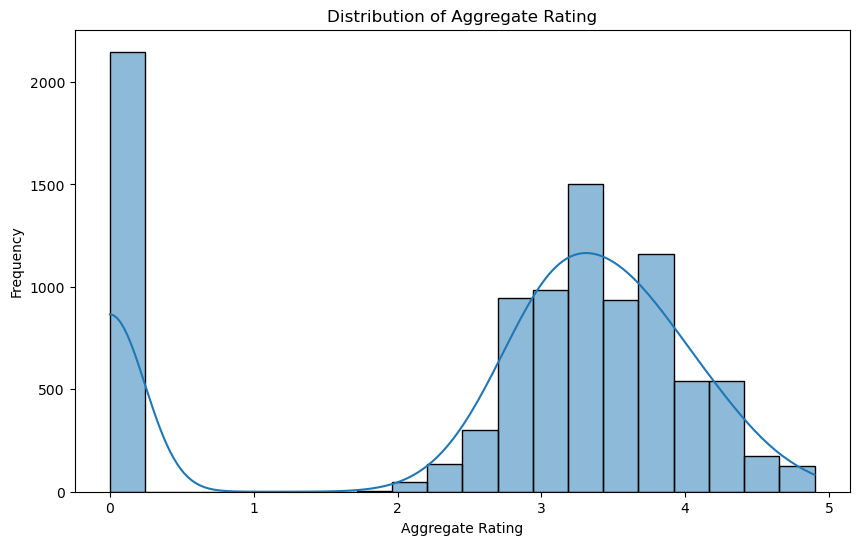

In [38]:
# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'], bins=20, kde=True)
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

In [40]:
# Check for class imbalance (e.g., grouping into categories)
# Define bins for ratings: Poor (0-2), Average (2-3), Good (3-4), Excellent (4-5)
bins = [0, 2, 3, 4, 5]
labels = ['Poor', 'Average', 'Good', 'Excellent']
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels, include_lowest=True)

In [42]:
# Count per category
rating_dist = df['Rating Category'].value_counts(normalize=True) * 100
print("\nDistribution of Rating Categories (%):")
print(rating_dist)


Distribution of Rating Categories (%):
Rating Category
Good         45.942833
Poor         22.594493
Average      19.798974
Excellent    11.663700
Name: proportion, dtype: float64


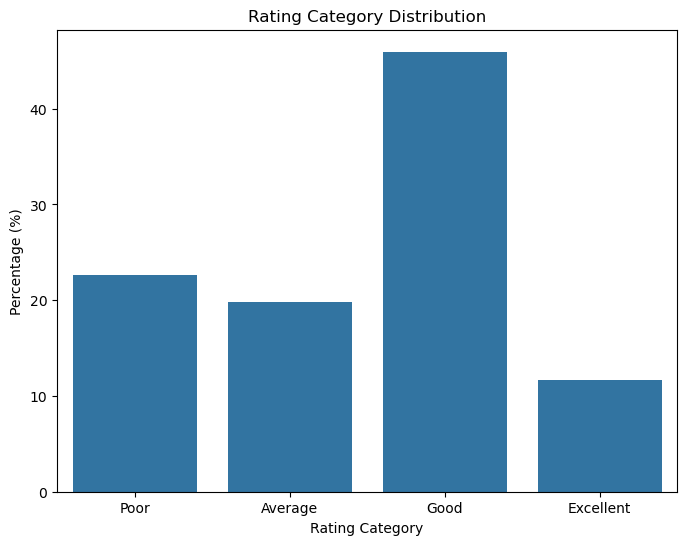

In [44]:
# Visualize
plt.figure(figsize=(8, 6))
sns.barplot(x=rating_dist.index, y=rating_dist.values)
plt.title('Rating Category Distribution')
plt.xlabel('Rating Category')
plt.ylabel('Percentage (%)')
plt.show()

In [46]:
# Assess imbalance
print("\nClass Imbalance Assessment:")
if any(rating_dist < 10):  # Arbitrary threshold for imbalance (e.g., <10% in a category)
    print("Potential class imbalance detected: Some categories have low representation.")
else:
    print("No significant class imbalance detected.")


Class Imbalance Assessment:
No significant class imbalance detected.
